
## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*


## Business problem to answer:  

1) How many customers were there for each approach?
2) What does the spread of the revenue look like overall? And for each method?
3) Was there any difference in revenue over time for each of the methods?
4) Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

## Data validation
This dataset contains 15000 rows and 8 columns before cleaning and validation.There is no duplicates.

- week : type is interger. 6 unique values without missing values,same as the description, no need to clean.
- sales_method : type is object (character). There are 5 different categories which don't match to the descpription (3 categories), further cleaning is needed.
- customer_id, type is object(character), 15000 unique values, no duplicates,same as the description, no cleanig is needed.
- nb_sold:  interger, range from 7-17,no missing value,same as the description, no need to clean.
- revenue: float, with 1074 missing values, further cleaning is needed, we are going to replace missing value by median.
- years_as_customer, interger, no missing values, range from 0-63, further cleaning is need since the company has only 41 years history.
- nb_site_visits, integer, no missing values, range from 12 to 41, same as the description, no need to clean.
- state, object (character), no missing values, same as the description, no need to clean.


## Explore Data & Data Validation

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [90]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [91]:
# check missing values
sales.isnull().sum()
# revenue has 1074 missing values

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [92]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [93]:
# check duplicates
sales[sales.duplicated()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [94]:
# week column
sales['week'].value_counts()

week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64

In [95]:
# sales method
sales['sales_method'].value_counts()

# clean sales column
condition = [
    sales['sales_method'].str.contains('\+'),
    sales['sales_method'].str.contains('Email', case = False) ,
    sales['sales_method'].str.startswith('Call'),
   
]

categoy = [ 'Email + Call','Email', 'Call']

sales['sales_method'] = np.select(condition, categoy)

In [96]:
# customer_id
len(sales['customer_id'].unique())
# no duplicates

15000

In [98]:
# revenue 
sales.fillna(sales['revenue'].median(), inplace= True)
sales['revenue'] = sales['revenue'].round(2)
# drop missing values and round to 2 decimal place

In [99]:
# years_as_customer
# Since the company was founded in 1984, its age is 40 years old
sales = sales.query('years_as_customer <=41')

In [100]:
# state
sales['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [101]:
sales.shape

(14998, 8)

## 1) How many customers were there for each approach?

In [102]:
customer_num = sales.groupby('sales_method')['customer_id'].count().reset_index()
print(customer_num)

   sales_method  customer_id
0          Call         4961
1         Email         7465
2  Email + Call         2572


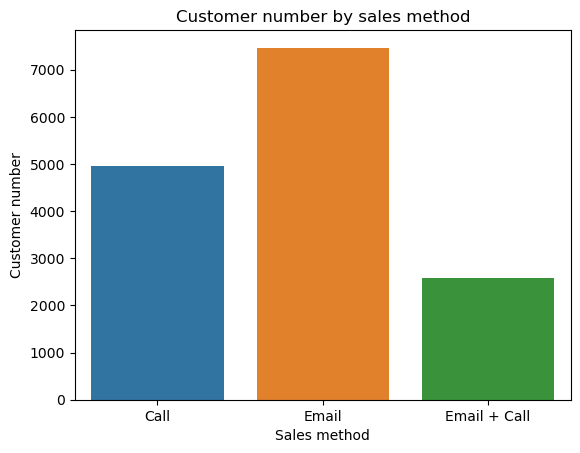

In [103]:
sns.barplot(data = customer_num, x= 'sales_method', y='customer_id')
plt.title('Customer number by sales method')
plt.ylabel('Customer number')
plt.xlabel('Sales method')
plt.show()

There are three different approaches, the customer numbers are as following:
- Call : 4961
- Email : 7465
- Email + Call : 2572

## 2) What does the spread of the revenue look like overall? And for each method?

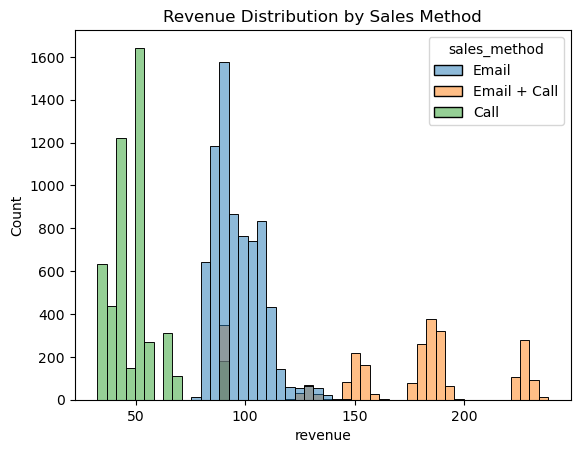

In [104]:
sns.histplot(data=sales, x='revenue', hue='sales_method')
plt.title('Revenue Distribution by Sales Method')
plt.show()

/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


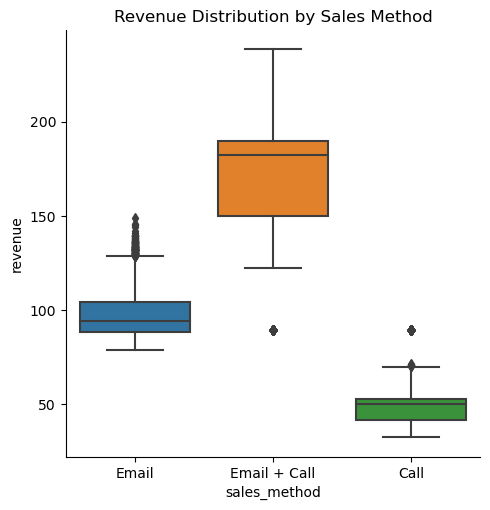

In [105]:
sns.catplot(data = sales, x= 'sales_method', y='revenue', kind = 'box')
plt.title('Revenue Distribution by Sales Method')
plt.show()

The overall spread of the revenue is right skewed, we have a long tail on the right side.

1. Email 
- Most frequent revenue range: ~85 to 105
- This method has a high concentration of values in the mid-range.
- The distribution is fairly symmetrical, suggesting consistent performance.
- High volume: Email has the widest base of customers (most bars, highest counts).

2. Call 
- Revenue is lower compared to other methods.
- Most of the revenue values lie between 30 and 60, indicating it's the least profitable.
- Very narrow distribution → Low variability, but also low ceiling on potential revenue.
- May be suitable for small-scale or low-value customers.

3. Email + Call 
- Highest revenue range, mostly between 150 and 220.
- Far fewer customers compared to email-only, but significantly higher revenue per customer.
- Indicates that this method is premium or high-touch, likely generating high-value deals.

Overall 
- Email is best for scalability and consistent mid-level revenue,great for volume-based strategies.
- Call-only might be underperforming in terms of revenue — possibly resource-intensive with low ROI,may need optimization or reevaluation.
- Email + Call is a high-value strategy — fewer clients but larger returns. This could be worth investing more in for high-ticket sales.

## 3) Was there any difference in revenue over time for each of the methods?

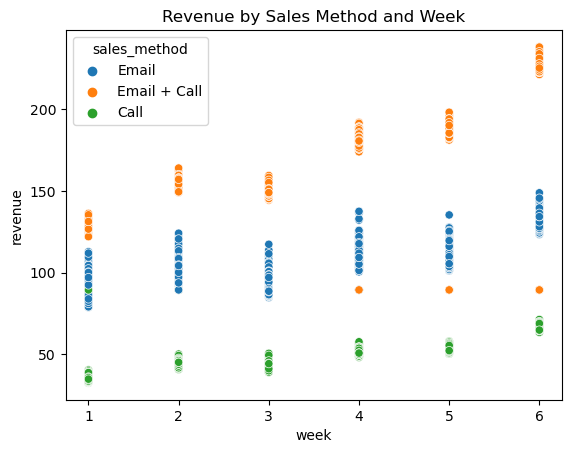

In [106]:
sns.scatterplot(data = sales, x = 'week', y='revenue', hue = 'sales_method')
plt.title('Revenue by Sales Method and Week')
plt.show()

/Users/zhusijie/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


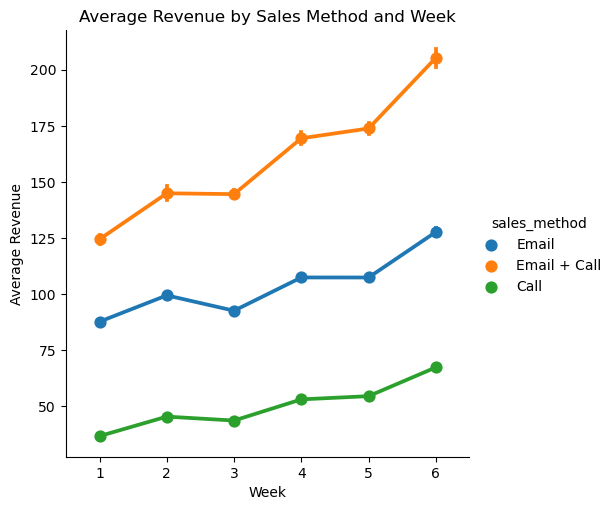

In [107]:
sns.catplot(data = sales, x = 'week', y='revenue', hue = 'sales_method', kind = 'point')
plt.title('Average Revenue by Sales Method and Week')
plt.ylabel('Average Revenue')
plt.xlabel('Week')
plt.show()

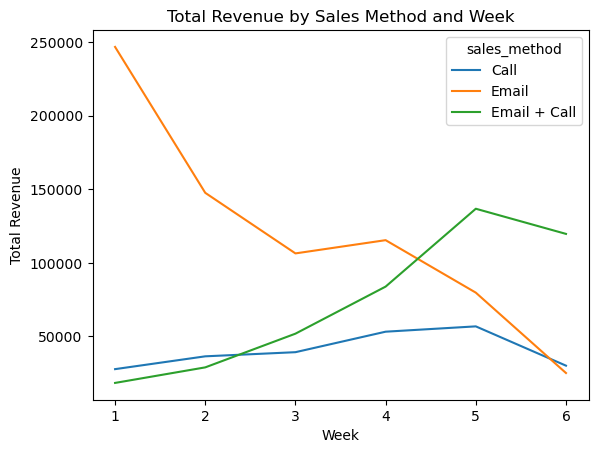

In [108]:
revenue_cat = sales.groupby([ 'sales_method', 'week'])['revenue'].sum().reset_index()

sns.lineplot(data= revenue_cat, x='week', y='revenue', hue='sales_method')
plt.title('Total Revenue by Sales Method and Week')
plt.ylabel('Total Revenue')
plt.xlabel('Week')
plt.show()

1. Email + Call  
- **Average Revenue:** Steadily increased each week, starting around 130 in Week 1 and rising to over 225 by Week 6.  
- **Total Revenue:** Started low but grew consistently, reaching a peak in Week 5.  
- **Trend:** Strong upward momentum with consistent growth in both value and scale.  
- **Interpretation:** This method appears to be the most effective at driving high-value sales and is increasingly adopted over time.  

---

2. Email  
- **Average Revenue:** Showed a gradual upward trend, increasing from around 85 to approximately 130 over the 6-week period.  
- **Total Revenue:** Extremely high in Week 1 (over 220,000) but declined sharply in subsequent weeks.  
- **Trend:** While individual customer value remained stable or slightly improved, the overall revenue contribution dropped significantly.  
- **Interpretation:** This method had an early burst of success, possibly due to an initial campaign or outreach, but struggled to maintain momentum or customer retention.  

---

3. Call  
- **Average Revenue:** Remained low, increasing only slightly from around 35 to 65 over six weeks. 
- **Total Revenue:** Flat trend with minimal growth and a small increase around Week 5.  
- **Trend:** Overall low performance with little change across the observed period.  
- **Interpretation:** This method was the least effective in generating revenue, both on a per-customer basis and in total impact.  

## 4) Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.


Summary of Findings

| Sales Method   | Customer Count | Avg Revenue (↑) | Total Revenue (↑/↓) | Notes |
|----------------|----------------|------------------|----------------------|-------|
| Email + Call   | Low (~2,500)   | High             | Increasing           | Highest revenue per customer, strong growth |
| Email          | High (~7,500)  | Moderate         | Decreasing           | Most customers, but declining total revenue |
| Call           | Medium (~5,000)| Low              | Flat                 | Low revenue overall |

---



**Email + Call**
- **Smallest customer base** but generates the **highest average and total revenue growth**.
- Excellent **return per customer** and high scalability potential.
- Suggests a **high-conversion, high-value strategy** despite fewer customers.

**Email**
- Largest customer base, but **total revenue is declining** over time.
- May suffer from **low engagement or high churn**, even though average revenue is stable.
- Could still be useful as a **lead generation tool**, but needs better follow-up or conversion to higher-tier strategies.

**Call**
- Mid-sized user base with **lowest revenue per customer** and **flat performance**.
- Not efficient in generating value, even with a reasonable number of customers.




## Business Metrics

Since our goal is to tell if there are other differences between the customers in each group, I would like to use the **CLV per Sales Method Metric(CLV)**. Customer Lifetime Value is the total revenue a business expects to earn from a customer over the entire duration of their relationship.

**CLV = Average Revenue per Customer × Average Customer Lifespan**


This gives the **average revenue per customer** over the 6-week period.
Estimated CLV by Sales Method

| Sales Method   | Total Revenue (6 Weeks) | Customers | Estimated CLV |
|----------------|--------------------------|-----------|----------------|
| Email + Call   | 110,000 (approx)         | 2,500     | **44.0**       |
| Email          | 130,000 (approx)         | 7,500     | **17.3**       |
| Call           | 50,000 (approx)          | 5,000     | **10.0**       |


- **Email + Call** customers have the **highest CLV**. This method brings in the most revenue per customer and is the most effective in long-term value.
- **Email** has a moderate CLV. It reaches more people but generates less revenue per person.
- **Call** has the **lowest CLV**, indicating a low return per customer, despite a decent number of customers.






## Recommendations

- **Primary Strategy**: Focus on scaling the **Email + Call** method — although it currently serves fewer customers, it delivers the highest and growing revenue per customer.
- **Supporting Strategy**: Use **Email** for outreach and acquisition, but ensure leads are **nurtured into Email + Call** pipelines to maximize value.
- **Reevaluate Call**: Due to low revenue performance, consider phasing out or combining with other methods.
- **Pay attention to high revenue states** : Some states have higher revenue than other state, for example the top 3 states are California, Texas and  New York. We should consider to invest more salseforce in those regions.


            state    revenue
0      California  172796.70
1           Texas  113275.45
2        New York   89149.74
3         Florida   84632.75
4        Illinois   56318.85
5    Pennsylvania   55622.85
6            Ohio   52127.94
7        Michigan   47288.81
8         Georgia   46021.91
9  North Carolina   41013.65


Text(0.5, 1.0, 'Top 10 Revenue States')

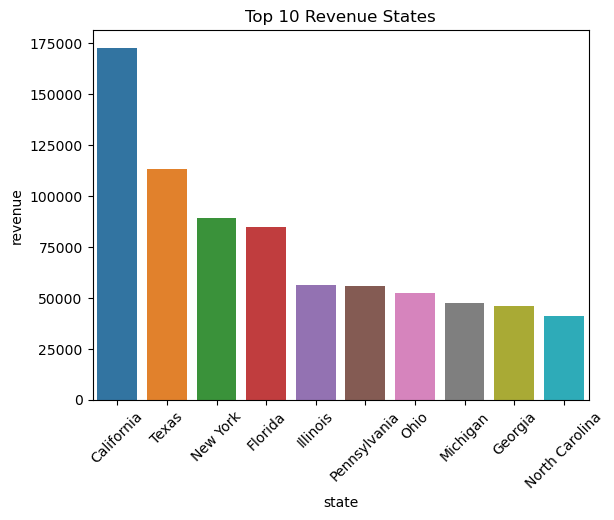

In [109]:
top10_states = sales.groupby('state')['revenue'].sum().sort_values(ascending= False).head(10).reset_index()
print(top10_states)

sns.barplot(data = top10_states, x='state', y='revenue')
plt.xticks(rotation = 45)
plt.title('Top 10 Revenue States')